$$S(t) +ab$$

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy import integrate
import numpy as np

In [ ]:
a = 0.5
b = 0.3
N = 1_000_000
S_0 = 990_000
I_0 = 7_000
R_0 = 3_000
t_0, t_f = 0, 25

#Швидкість зміни кількості схильних до хвороби індивідів складає

In [ ]:
def dsdt(t, S):
  return - a * S

In [ ]:
s_t_solve = solve_ivp(dsdt, (t_0, t_f), [S_0])
t, y = s_t_solve.t, s_t_solve.y[0]

In [ ]:
S_t_cubic = interp1d(t, y, kind='cubic')

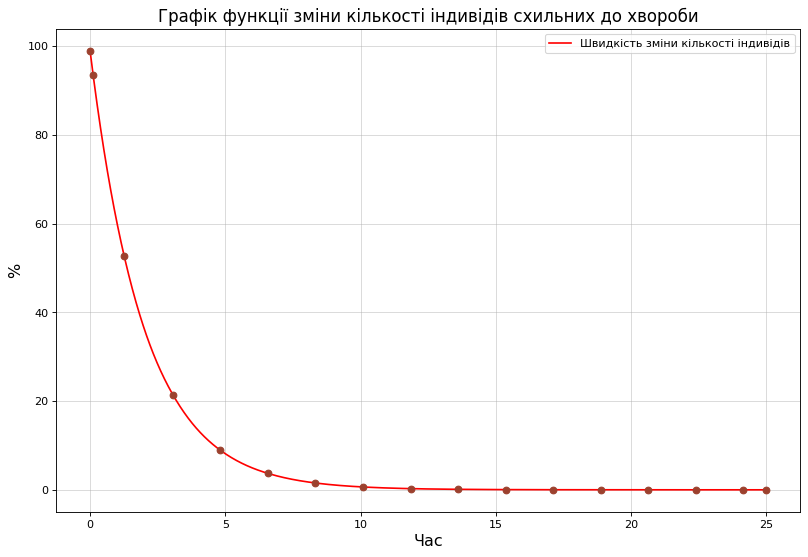

In [ ]:
plt.figure(figsize=(12,8), dpi= 80)

more_velues = np.linspace(t_0, t_f, 2000)

plt.plot(more_velues, S_t_cubic(more_velues)/N*100, 'red', label="Швидкість зміни "\
         "кількості індивідів")
plt.plot(t, y/N*100, "o", color="#9C412E")
plt.legend()

plt.xlabel('Час', size="x-large")
plt.ylabel('%', size="x-large")
plt.title('Графік функції зміни кількості індивідів схильних до хвороби', fontsize=15)

plt.grid(alpha=0.5)
plt.show()

In [ ]:
def didt (t, I):
  return a * S_t_cubic(t) - b * I

In [ ]:
i_t_solve = solve_ivp(didt, (t_0, t_f), [I_0])
t, y = i_t_solve.t, i_t_solve.y[0]
i_t_cubic = interp1d(t, y, kind='cubic')

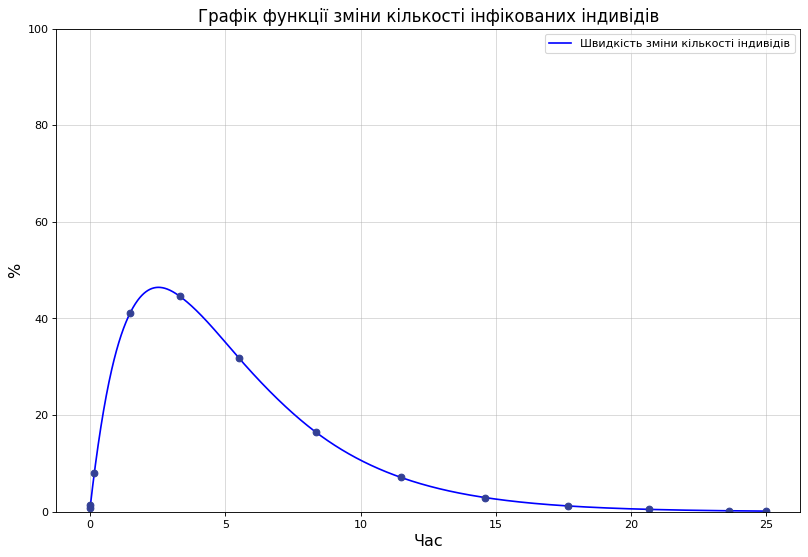

In [ ]:
plt.figure(figsize=(12,8), dpi= 80)

more_velues = np.linspace(t_0, t_f, 2000)

plt.plot(more_velues, i_t_cubic(more_velues)/N*100, 'blue', label="Швидкість зміни "\
         "кількості індивідів")
plt.plot(t, y/N*100, "o", color="#334095")
plt.legend()

plt.ylim(0,100)
plt.xlabel('Час', size="x-large")
plt.ylabel('%', size="x-large")
plt.title('Графік функції зміни кількості інфікованих індивідів', fontsize=15)

plt.grid(alpha=0.5)
plt.show()

In [ ]:
def dRdt(t, R):
    return b * i_t_cubic(t)

In [58]:
more_t = np.linspace(t_0, t_f, 200)
r_t_solve = solve_ivp(dRdt, (t_0, t_f), [R_0], t_eval = more_t)

t, r = r_t_solve.t, r_t_solve.y[0]


In [54]:

r_t_cubic = interp1d(t, r, kind='cubic')

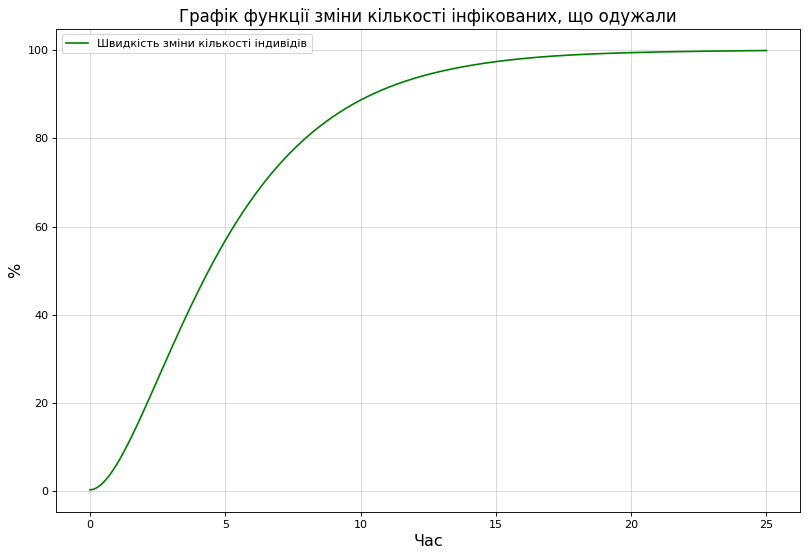

In [56]:
plt.figure(figsize=(12,8), dpi= 80)

more_velues = np.linspace(t_0, t_f, 2000)

plt.plot(more_velues, r_t_cubic(more_velues)/N*100, 'green', label="Швидкість зміни "\
         "кількості індивідів")


plt.legend()

plt.xlabel('Час', size="x-large")
plt.ylabel('%', size="x-large")
plt.title('Графік функції зміни кількості інфікованих, що одужали', fontsize=15)

plt.grid(alpha=0.5)
plt.show()

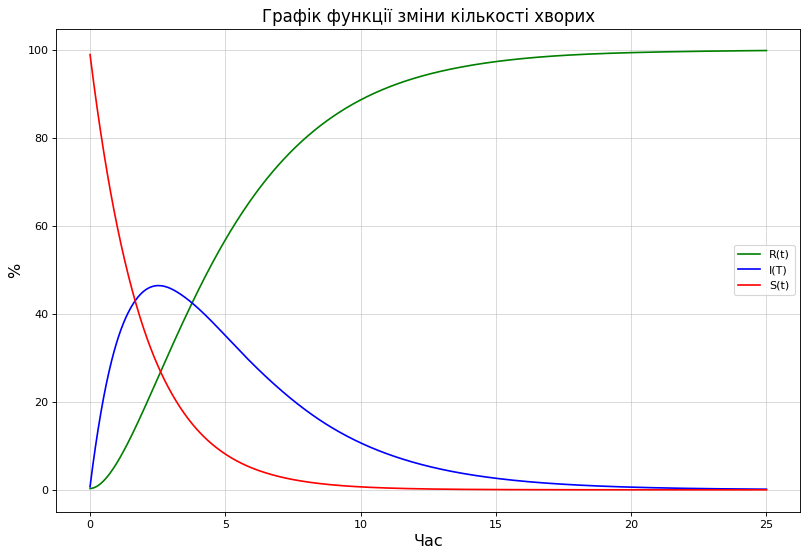

In [57]:
plt.figure(figsize=(12,8), dpi= 80)

more_velues = np.linspace(t_0, t_f, 2000)

plt.plot(more_velues, r_t_cubic(more_velues)/N*100, 'green', label="R(t)")
plt.plot(more_velues, i_t_cubic(more_velues)/N*100, 'blue', label="I(T)")
plt.plot(more_velues, S_t_cubic(more_velues)/N*100, 'red', label="S(t)")
plt.legend()

plt.xlabel('Час', size="x-large")
plt.ylabel('%', size="x-large")
plt.title('Графік функції зміни кількості хворих', fontsize=15)

plt.grid(alpha=0.5)
plt.show()